<a href="https://colab.research.google.com/github/Seneprospect/DataScience/blob/main/CP_Apprentissages_supervise_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apprentissage_supervise_classification: La classification est une tache d'apprentissage automatique ou l'on cherche à predire une étiquette (ou classe) categorique(ex:Malade ou pas malade) à partir d'un ensemble de caractéristiques ( variables indépendantes).

# Enonce du projet: Prediction de l'etat de santé au Sénégal

Contexte : Vous êtes une équipe de data scientists en formation travaillant pour une organisation de santé au Sénégal. L'objectif de ce projet est de construire un modèle d'apprentissage automatique capable de prédire l'état de santé d'un patient (par exemple, présence ou absence d'une maladie spécifique - notre colonne cible 'Diagnostic_Maladie_A' dans le dataset sante_senegal.csv) en se basant sur des informations cliniques de base.

# Chargement du jeu de données

In [ ]:
import pandas as pd
df=pd.read_csv("sante_senegal.csv")
df

,ID_Patient,Region,Age,Sexe,Temperature,Taux_Hemoglobine,Presence_Douleurs_Abdominales,Frequence_Respiratoire,Tension_Arterielle_Systolique,Tension_Arterielle_Diastolique,Taux_Glucose,Symptomes_Jaundice,Diagnostic_Maladie_A
0,1,Saint-Louis,71,Femme,36.4,17.0,Non,18,123.0,60.0,4.1,1.0,1
1,2,Sikasso,30,Femme,37.9,11.5,Non,12,119.0,73.0,5.4,0.0,0
2,3,Sédhiou,8,Homme,36.1,11.9,Non,24,121.0,85.0,6.6,0.0,1
3,4,Tambacounda,50,Homme,38.9,14.7,Non,14,113.0,83.0,6.7,0.0,0
4,5,Dakar,28,Femme,36.9,12.2,Oui,15,128.0,72.0,3.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Kaffrine,17,Femme,39.2,13.3,Non,16,112.0,108.0,5.7,0.0,1
796,797,Kédougou,39,Homme,35.9,13.2,Oui,18,108.0,95.0,4.3,0.0,0
797,798,Tambacounda,20,Femme,38.3,14.1,Non,27,114.0,85.0,9.2,NaN,0
798,799,Kolda,14,Homme,36.8,11.3,Non,12,129.0,103.0,6.6,0.0,1


In [ ]:
#Infos sur les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_Patient                      800 non-null    int64  
 1   Region                          800 non-null    object 
 2   Age                             800 non-null    int64  
 3   Sexe                            782 non-null    object 
 4   Temperature                     800 non-null    float64
 5   Taux_Hemoglobine                800 non-null    float64
 6   Presence_Douleurs_Abdominales   762 non-null    object 
 7   Frequence_Respiratoire          800 non-null    int64  
 8   Tension_Arterielle_Systolique   800 non-null    float64
 9   Tension_Arterielle_Diastolique  800 non-null    float64
 10  Taux_Glucose                    800 non-null    float64
 11  Symptomes_Jaundice              772 non-null    float64
 12  Diagnostic_Maladie_A            800 

In [ ]:
#statistiques descriptives
df.describe()

,ID_Patient,Age,Temperature,Taux_Hemoglobine,Frequence_Respiratoire,Tension_Arterielle_Systolique,Tension_Arterielle_Diastolique,Taux_Glucose,Symptomes_Jaundice,Diagnostic_Maladie_A
count,800.0000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,772.000000,800.000000
mean,400.5000,45.36000,37.450500,13.050375,20.380000,119.826250,79.480000,5.395750,0.161917,0.285000
std,231.0844,29.28455,1.386905,2.110727,5.126739,14.620902,10.582513,1.533483,0.368614,0.451697
min,1.0000,0.00000,25.400000,7.000000,12.000000,71.000000,44.000000,0.600000,0.000000,0.000000
25%,200.7500,22.00000,36.700000,11.675000,16.000000,110.000000,73.000000,4.300000,0.000000,0.000000
50%,400.5000,44.00000,37.500000,13.000000,20.000000,120.000000,79.000000,5.400000,0.000000,0.000000
75%,600.2500,66.00000,38.300000,14.400000,25.000000,129.000000,86.000000,6.500000,0.000000,1.000000
max,800.0000,193.00000,41.300000,22.100000,29.000000,165.000000,112.000000,10.000000,1.000000,1.000000


# Nettoyage et pretraitement des données

In [ ]:
#vérification des valeurs manquantes
df.isnull().sum()

ID_Patient                         0
Region                             0
Age                                0
Sexe                              18
Temperature                        0
Taux_Hemoglobine                   0
Presence_Douleurs_Abdominales     38
Frequence_Respiratoire             0
Tension_Arterielle_Systolique      0
Tension_Arterielle_Diastolique     0
Taux_Glucose                       0
Symptomes_Jaundice                28
Diagnostic_Maladie_A               0
dtype: int64

In [ ]:
#Remplacer les valeurs manquantes par le mode
colonnes=["Sexe","Presence_Douleurs_Abdominales","Symptomes_Jaundice"]

for col in colonnes:
    mode=df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

/var/folders/r4/0pbxyrr14pd5yyt32v1qwygm0000gn/T/ipykernel_24682/4099754111.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)


In [ ]:
df['Region'].unique()

array(['Saint-Louis', 'Sikasso', 'Sédhiou', 'Tambacounda', 'Dakar',
       'Kaffrine', 'Kolda', 'Matam', 'Thiès', 'Ziguinchor', 'Kaolack',
       'Louga', 'Kédougou'], dtype=object)

In [ ]:
df.shape[0]

759

In [ ]:
df=df[df['Region'] != 'Sikasso']

In [ ]:
df.isnull().sum()

ID_Patient                        0
Region                            0
Age                               0
Sexe                              0
Temperature                       0
Taux_Hemoglobine                  0
Presence_Douleurs_Abdominales     0
Frequence_Respiratoire            0
Tension_Arterielle_Systolique     0
Tension_Arterielle_Diastolique    0
Taux_Glucose                      0
Symptomes_Jaundice                0
Diagnostic_Maladie_A              0
dtype: int64

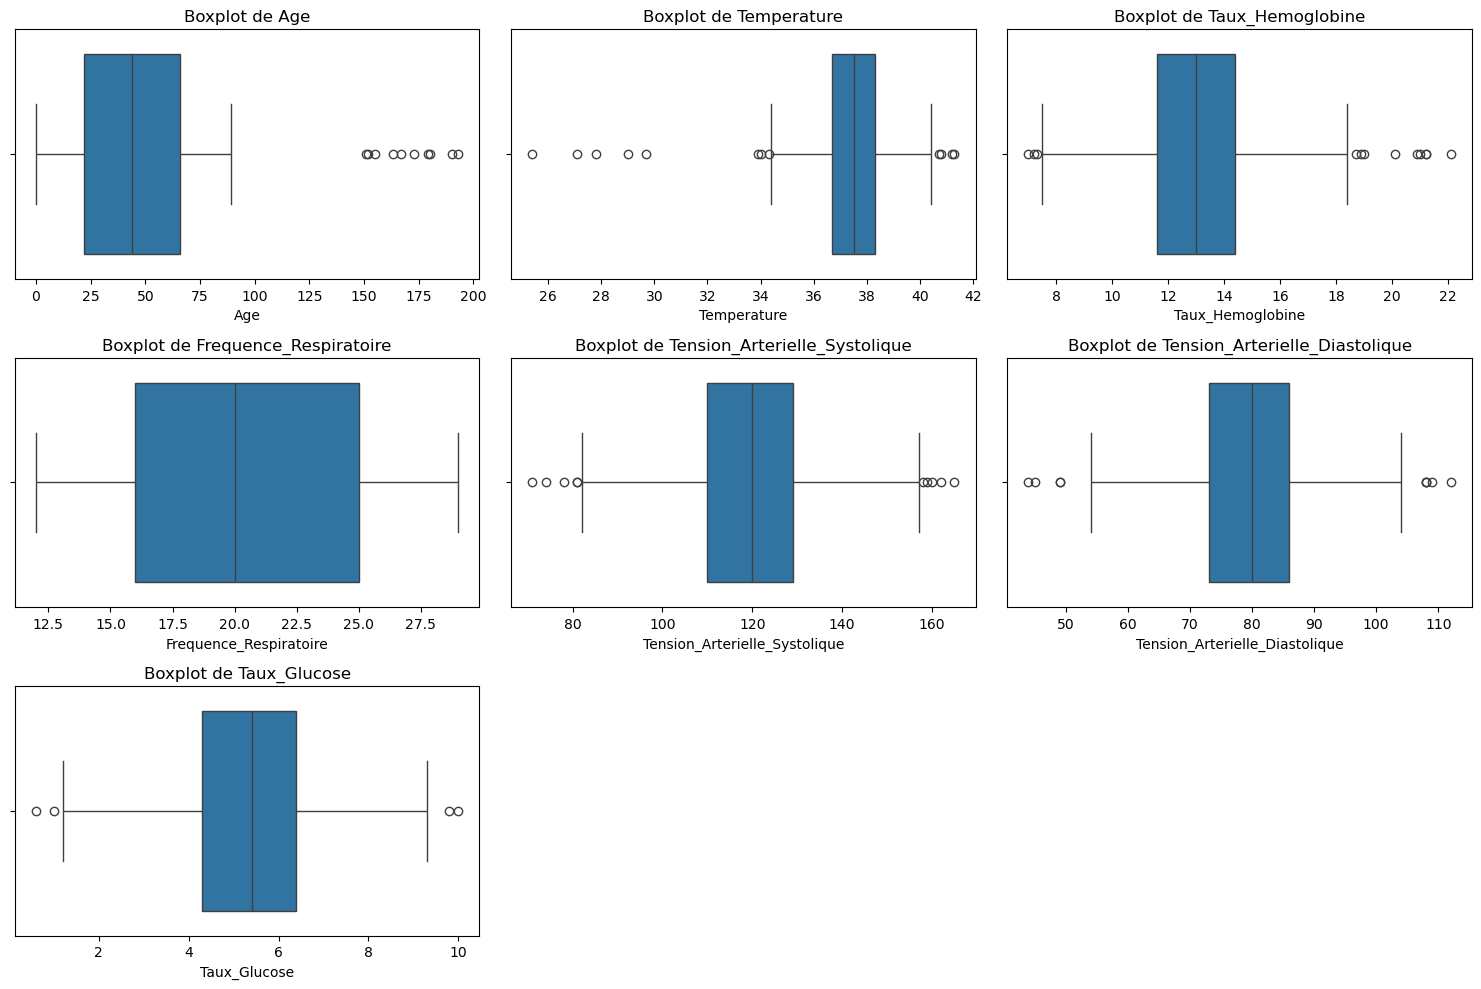

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables=['Age','Temperature','Taux_Hemoglobine','Frequence_Respiratoire','Tension_Arterielle_Systolique','Tension_Arterielle_Diastolique',
           'Taux_Glucose']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3,3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f"Boxplot de {var}")
plt.tight_layout()  # rend les données propres
plt.show()

In [ ]:
#Detecter les valeurs aberrantes
def aberrantes(df,colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sub = Q3 + 1.5 * IQR
    outliers=df[(df[colonne]< borne_inf) | (df[colonne]> borne_sub)]
    return outliers
variables=['Age','Temperature','Taux_Hemoglobine','Frequence_Respiratoire','Tension_Arterielle_Systolique','Tension_Arterielle_Diastolique',
           'Taux_Glucose']
for col in variables:
    outliers= aberrantes(df,col)
    print(f"{col} - Nombre de valeurs aberrantes : {len(outliers)}")

Age - Nombre de valeurs aberrantes : 10
Temperature - Nombre de valeurs aberrantes : 12
Taux_Hemoglobine - Nombre de valeurs aberrantes : 12
Frequence_Respiratoire - Nombre de valeurs aberrantes : 0
Tension_Arterielle_Systolique - Nombre de valeurs aberrantes : 10
Tension_Arterielle_Diastolique - Nombre de valeurs aberrantes : 9
Taux_Glucose - Nombre de valeurs aberrantes : 4
